In [1]:
import numpy as np
import pandas as pd
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy.stats import shapiro

import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

In [2]:
def load_file(filepath, ext):
    ext=ext
    if ext=='csv':
        data =  []
        col = []
        checkcol = False
        with open(filepath) as f:
            for val in f.readlines():
                val = val.replace("\n","")
                val = val.split(',')
                if checkcol is False:
                    col = val
                    checkcol = True
                else:
                    data.append(val)
        df = pd.DataFrame(data=data, columns=col)
    elif ext=='xlsx':
        df = pd.read_excel(filepath)
    else:
        df='No such file can be extracted'
    return df

df=load_file('C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment-6\\Churn\\telecom_users.xlsx','xlsx')
df


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [3]:
print(df.dtypes)

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Function-2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)


In [4]:
def data_display(data, n):
    # Create a DataFrame object
    df = pd.DataFrame(data)
    #print("Contents of the Dataframe : ")
    #print(df)
    
    print('**** Shape of the Data ****')
    #df.shape
    print(df.shape)
    print('**** Columns Name ****')
    print(df.columns)
    print('**** Data Type of Columns ****')
    print(df.dtypes)
    
    print('**** Select first n Rows from a Dataframe using head() function ****')
    # Select the top n rows of the Dataframe
    dfObj1 = df.head(n)
    print("First", n, "rows of the Dataframe : ")
    print(dfObj1)
    print('**** Select last n Rows from a Dataframe using tail() function ****')
    # Select the bottom n rows of the Dataframe
    dfObj2 = df.tail(n)
    print("Last",n, "rows of the Dataframe : ")
    print(dfObj2)

#call function
data_display(df, 10)

**** Shape of the Data ****
(5986, 22)
**** Columns Name ****
Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')
**** Data Type of Columns ****
Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
P

In [5]:
def vcounts():
    print(df['PhoneService'].value_counts())
    print(df['MultipleLines'].value_counts())
    print(df['InternetService'].value_counts())
    print(df['OnlineSecurity'].value_counts())
    print(df['OnlineBackup'].value_counts())
    print(df['DeviceProtection'].value_counts())
    print(df['TechSupport'].value_counts())
    print(df['StreamingTV'].value_counts())
    print(df['StreamingMovies'].value_counts())
    print(df['Contract'].value_counts())
    print(df['PaymentMethod'].value_counts())
    print(df['PaperlessBilling'].value_counts())
vcounts()

Yes    5396
No      590
Name: PhoneService, dtype: int64
No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64
Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64
No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64
No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64
No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64
No                     2960
Yes                    1735
No internet service    1291
Name: TechSupport, dtype: int64
No                     2389
Yes                    2306
No internet service    1291
Name: StreamingTV, dtype: int64
No                     2356
Yes                    2339
No internet service    1291
Name: StreamingMovies, dtype: int64
Month-to-month    3269
Two ye

In [6]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service':'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service':'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service':'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service':'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service':'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service':'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service':'No'})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)':'automatic','Credit card (automatic)':'automatic','Electronic check':'NoAutomatic','Mailed check':'NoAutomatic'})
vcounts()


Yes    5396
No      590
Name: PhoneService, dtype: int64
No     3438
Yes    2548
Name: MultipleLines, dtype: int64
Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64
No     4273
Yes    1713
Name: OnlineSecurity, dtype: int64
No     3896
Yes    2090
Name: OnlineBackup, dtype: int64
No     3931
Yes    2055
Name: DeviceProtection, dtype: int64
No     4251
Yes    1735
Name: TechSupport, dtype: int64
No     3680
Yes    2306
Name: StreamingTV, dtype: int64
No     3647
Yes    2339
Name: StreamingMovies, dtype: int64
Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64
NoAutomatic    3375
automatic      2611
Name: PaymentMethod, dtype: int64
Yes    3528
No     2458
Name: PaperlessBilling, dtype: int64


In [7]:
df['Churn'] = df['Churn'].astype(str)
df['Churn'] = df['Churn'].replace({'1':'Yes','0':'No'})

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

def ordinal_example(data):
    oe = OrdinalEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

def label_example(data):
    oe = LabelEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

def onehot_example(data):
    oe = OneHotEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

In [9]:
df2 = df.copy(deep=True)

In [10]:
df1=df2

In [11]:
df1

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No,No,No,No,Two year,No,automatic,24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,automatic,88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,automatic,74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,NoAutomatic,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,NoAutomatic,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,NoAutomatic,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,automatic,91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No,No,No,No,Month-to-month,Yes,NoAutomatic,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,NoAutomatic,99.45,1200.15,Yes


In [12]:
df1=df1.drop(['Unnamed: 0','customerID'], axis=1)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      False          False    False       False   False         False   
1      False          False    False       False   False         False   
2      False          False    False       False   False         False   
3      False          False    False       False   False         False   
4      False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
5981   False          False    False       False   False         False   
5982   False          False    False       False   False         False   
5983   False          False    False       False   False         False   
5984   False          False    False       False   False         False   
5985   False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             False            False     

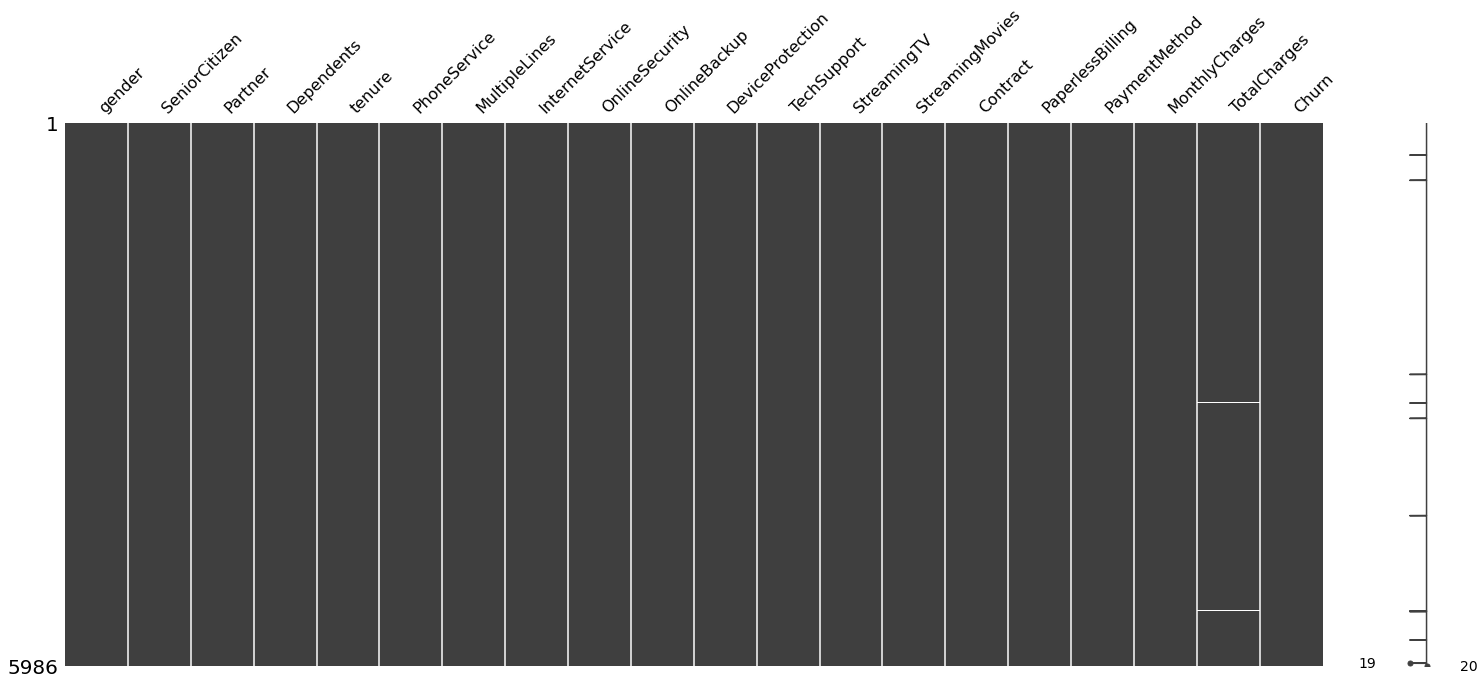

In [23]:
def misval(data):
    df=data
    print (df.isnull())
    print(df.isnull().sum())
    mano.matrix(df)
misval(df1)

In [24]:
def misvalfill(data):
    col=input("Enter Column Name:")
    print("Choose among Mean, LinInter")
    option=input("Enter Option Name:")
    if option=='Mean':
        data[col]=data[col].fillna(data[col].mean())
    #elif option=='Mode':
     #   data[col]=data[col].fillna(data[col].value_counts())
    elif option=='LinInter':
        data[col]=data[col].fillna(data[col].interpolate(method ='linear', limit_direction ='forward'))
    return data

df1=misvalfill(df1)

Enter Column Name:TotalCharges
Choose among Mean, LinInter
Enter Option Name:LinInter


In [25]:
#df1.isnull.sum()
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
df1['SeniorCitizen'] = df1['SeniorCitizen'].astype(str)
df1['SeniorCitizen'] = df1['SeniorCitizen'].replace({'1':'Yes','0':'No'})

In [27]:
#df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"], downcast="float")
df1["TotalCharges"] = df1["TotalCharges"].astype(float)

In [28]:
df1.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [29]:
df3 = df1.loc[:, df1.columns != 'Churn']
df3 = pd.get_dummies(df3)
df3.head(10)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_NoAutomatic,PaymentMethod_automatic
0,72,24.10,1734.65,0,1,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,44,88.15,3973.20,1,0,1,0,1,0,1,...,1,1,0,1,0,0,0,1,0,1
2,38,74.95,2869.85,1,0,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
3,4,55.90,238.50,0,1,1,0,1,0,1,...,0,0,1,1,0,0,0,1,1,0
4,2,53.45,119.50,0,1,1,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
5,70,49.85,3370.20,1,0,1,0,0,1,1,...,0,0,1,0,0,1,0,1,0,1
6,33,90.65,2989.60,1,0,1,0,1,0,1,...,0,0,1,1,0,0,0,1,1,0
7,1,24.90,24.90,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,1,1,0
8,39,35.55,1309.15,0,1,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
9,55,116.50,6382.55,0,1,0,1,1,0,1,...,1,0,1,1,0,0,0,1,1,0


In [30]:
df3.dtypes

tenure                           int64
MonthlyCharges                 float64
TotalCharges                   float64
gender_Female                    uint8
gender_Male                      uint8
SeniorCitizen_No                 uint8
SeniorCitizen_Yes                uint8
Partner_No                       uint8
Partner_Yes                      uint8
Dependents_No                    uint8
Dependents_Yes                   uint8
PhoneService_No                  uint8
PhoneService_Yes                 uint8
MultipleLines_No                 uint8
MultipleLines_Yes                uint8
InternetService_DSL              uint8
InternetService_Fiber optic      uint8
InternetService_No               uint8
OnlineSecurity_No                uint8
OnlineSecurity_Yes               uint8
OnlineBackup_No                  uint8
OnlineBackup_Yes                 uint8
DeviceProtection_No              uint8
DeviceProtection_Yes             uint8
TechSupport_No                   uint8
TechSupport_Yes          

In [31]:
df3.to_excel('finaldata.xlsx')

In [32]:
y = df2['Churn'].copy()
X = df3


In [33]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[787  87]
 [186 138]]
              precision    recall  f1-score   support

          No       0.81      0.90      0.85       874
         Yes       0.61      0.43      0.50       324

    accuracy                           0.77      1198
   macro avg       0.71      0.66      0.68      1198
weighted avg       0.76      0.77      0.76      1198



In [39]:
error = []
# Calculating error for K values between 1 and 35
for i in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

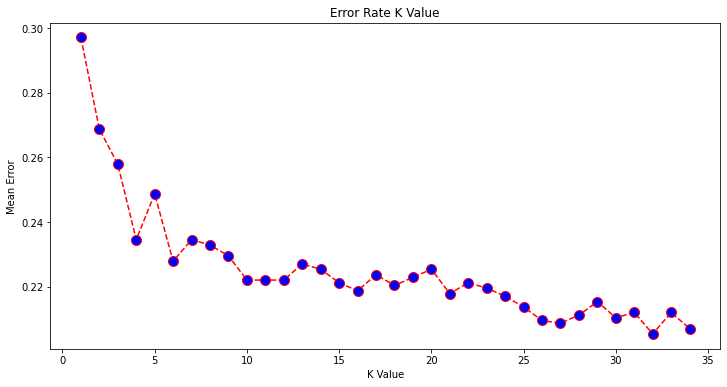

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 35), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

F15: function to split dataframe into X (predictors) and y (label), apply standard scaling on X, apply the desired ML algorithm and output the results:¶
Â - input dataframe Â - input the algo name (e.g., decisiontree) Â - input whether this is a classification task or a regression task (then you should select either decisiontreeclassifier or decisiontreeregressor within the function) Â - for classification, output confusion matrix, AUC, logloss and classification report Â - for regression, output MAE, MSE, R-squared and adjusted R-squaredÂ Â - NB: you can add more metrics if available

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [35]:
def LReg(x_train, x_test, y_train, y_test):
    print('================================================================================')
    print('Linear Regression Model Results')
    print('_______________________________________________________________________________')
    #LinearRegression model
    LR = LinearRegression(normalize=True)

    #fit
    LR.fit(x_train, y_train)

    #predict
    y_predict = LR.predict(x_test)

    #score variables
    LR_MAE = round(MAE(y_test, y_predict),2)
    LR_MSE = round(MSE(y_test, y_predict),2)
    LR_R_2 = round(R2(y_test, y_predict),4)
    LR_CS  = round(CVS(LR, x, y, cv=5).mean(),4)

    print(f" Mean Absolute Error: {LR_MAE}\n")
    print(f" Mean Squared Error: {LR_MSE}\n")
    print(f" R^2 Score: {LR_R_2}\n")
    cross_val(LR,LinearRegression(),x,y,5)
    Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
    Linear_Regression
    print('================================================================================')


def LASOO(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Lasso Regression Model Results')
    print('_______________________________________________________________________________')
    LS = Lasso(alpha = 0.9)
    #fit
    LS.fit(x_train,y_train)

    #predict
    y_predict = LS.predict(x_test)

    #score variables
    LS_MAE = round(MAE(y_test, y_predict),2)
    LS_MSE = round(MSE(y_test, y_predict),2)
    LS_R_2 = round(R2(y_test, y_predict),4)
    LS_CS  = round(CVS(LS, x, y, cv=5).mean(),4)

    print(f" Mean Absolute Error: {LS_MAE}\n")
    print(f" Mean Squared Error: {LS_MSE}\n")
    print(f" R^2 Score: {LS_R_2}\n")
    cross_val(LS,Lasso(alpha = 0.05),x,y,5)
    Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
    Lasso_Regressor 
    print('================================================================================')

    
    
#Decision Tree for Regression    
    


def DTReg(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Decision Tree Model Results for Regression Problem')
    print('_______________________________________________________________________________')
    
    #from sklearn.tree import DecisionTreeRegressor
    #from sklearn import metrics
    regressor = DecisionTreeRegressor()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)

    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df
    #from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    dt_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
    dt_Regressor 
    print('================================================================================')


#KNN for Regression    
def KNNReg(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('KNN Model Results for Regression Problem')
    print('_______________________________________________________________________________')  
        
    #from sklearn.neighbors import KNeighborsClassifier
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(x_train, y_train)
    y_pred = knn_reg.predict(x_test)
    
    
    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    #df
    #from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    knn_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
    knn_Regressor 
    print('================================================================================')

    
    error = []

# Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print('================================================================================')

    
    
    
    
    
    
    
    
    
    
    
    
    
#Classification Functions

#Decision Tree for Classification
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import classification_report, confusion_matrix
def DTClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Decision Tree Model Results for Classification Problem')
    print('_______________________________________________________________________________')
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
#from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    



#Building Naive Bayes for Classification
def NBClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Naive Bayes Model Results for Classification Problem')
    print('_______________________________________________________________________________')  
    
    # Fitting Naive Bayes to the Training set  
#from sklearn.naive_bayes import GaussianNB  
    classifier = GaussianNB()  
    classifier.fit(x_train, y_train)  
# Predicting the Test set results  
    y_pred = classifier.predict(x_test) 
# Making the Confusion Matrix  
#from sklearn.metrics import confusion_matrix  
    cm = confusion_matrix(y_test, y_pred)  
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    print(y_test, y_pred)
    print('================================================================================')

#KNN for Classification    
def KNNClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('KNN Model Results for Classification Problem')
    print('_______________________________________________________________________________')  
        
    #from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train, y_train)
    
    y_pred = classifier.predict(x_test)
    #from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    error = []

# Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print('================================================================================')

    
    
    
    

In [36]:
def ML_alg(y,X):
    
    print("Choose among KNN, DecisionTree, etc")
    alg=input("Enter Algorithm Name:")
    print("Choose C for Classification and R for Regression Problem")
    option=input("Is it Classification Probelem or Regression Task:")
    print('Choose Scaling Method i.e. MinMaxScaler, StandardScaler ')
    transform=input("Enter the Scaling Method:")
    
    y=y
    X=X
    #X = data.iloc[:, :-1].values
    #y = data.iloc[:, 12].values
    
    if transform=='MinMaxScaler':
        scaler = MinMaxScaler()
        # transform data
        X = scaler.fit_transform(X)
    if transform=='StandardScaler':
        scaler = StandardScaler()
        # transform data
        X = scaler.fit_transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)   
        
    
    if option=='C':
        if alg=='KNN':
            #KNN Classification Algrotham
            KNNClassification(x_train, x_test, y_train, y_test)
        elif alg=='DecisionTree':
            #Decision tree function for classification
            DTClassification(x_train, x_test, y_train, y_test)
        elif alg=='NaiveBayes':
            #NaiveBayes function for NaiveBayes
            NBClassification(x_train, x_test, y_train, y_test)
        elif alg=='LogisticReg':
            #Logistic Regression for Classification
            print('not ready now')
    elif option=='R':
        if alg=='KNN':
            #KNN Regrssion Algrotham
            KNNReg(x_train, x_test, y_train, y_test)
        elif alg=='DecisionTree':
            #Decision tree function for Regression
            DTReg(x_train, x_test, y_train, y_test)
        elif alg=='OLS':
            #OLS function for Regression
            LReg(x_train, x_test, y_train, y_test)
        elif alg=='Lasso':
            #Lasso function for Regression
            LASOO(x_train, x_test, y_train, y_test)
        elif alg=='NaiveBayes':
            print('Naive Bayse is only for Classification Problems')
        elif alg=='LogisticReg':
            print('Logistic Function is only for Classification Problems')
            

Choose among KNN, DecisionTree, etc
Enter Algorithm Name:KNN
Choose C for Classification and R for Regression Problem
Is it Classification Probelem or Regression Task:C
Choose Scaling Method i.e. MinMaxScaler, StandardScaler 
Enter the Scaling Method:MinMaxScaler
KNN Model Results for Classification Problem
_______________________________________________________________________________
[[933 161]
 [217 186]]
              precision    recall  f1-score   support

          No       0.81      0.85      0.83      1094
         Yes       0.54      0.46      0.50       403

    accuracy                           0.75      1497
   macro avg       0.67      0.66      0.66      1497
weighted avg       0.74      0.75      0.74      1497



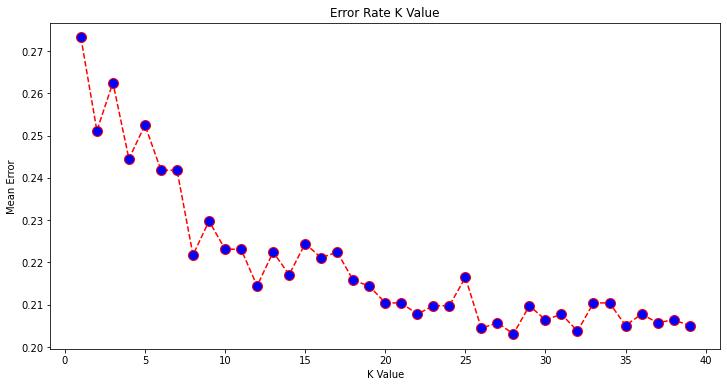

In [37]:
ML_alg(y,X)